In [134]:
import sys 
import os
import numpy as np
import itertools
from dataclasses import dataclass
from matplotlib import pyplot as plt
from typing import Optional, Mapping, Dict, Tuple

sys.path.append(os.path.abspath("/Users/quinnhollister/RL-book/rl/markov_process.py"))
from rl import markov_process
from rl.distribution import Categorical, Constant, Categorical, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess, NonTerminal

    
    
##For Questions 2 and 4
    
moves   = [0,38,2,3,14,5,6,7,8,31,10,11,12,13,14,15,6,17,18,19,20,\
          42,22,23,24,25,26,27,84,29,30,31,32,33,34,35,44,37,38,39,40,\
          41,42,43,44,45,46,26,48,11,50,67,52,53,54,55,53,57,58,59,60,\
          61,19,63,60,65,66,67,68,69,70,91,72,73,74,75,76,77,78,79,100,\
          81,82,83,84,85,86,24,88,89,90,91,92,73,94,75,96,97,78,99,100]

non_terminal = set(moves)
non_terminal.remove(100)



@dataclass(frozen=True)
class StateSL:
    square: int


class SnakesLadders(FiniteMarkovProcess[StateSL]):
    def __init__(self):
        super().__init__(self.get_transition_map())
    
    
    def get_transition_map(self) -> Mapping[StateSL, FiniteDistribution[StateSL]]:
        d: Dict[StateSL, Categorical[StateSL]] = {}
        for state in non_terminal:
            state_probs_map: Mapping[StateSL, float] = {}
            for i in range(1,7):                    
                nextState = None
                if state+i >= len(moves):
                    nextState = StateSL(100)
                    state_probs_map[nextState] = state_probs_map.get(nextState, 1/6.) + 1/6.;
                else:
                    nextState = StateSL(moves[state+i])
                    state_probs_map[nextState] = state_probs_map.get(nextState, 1/6.) + 1/6.;
            d[StateSL(state)] = Categorical(state_probs_map)
        return d;    


In [149]:
SL_MP = SnakesLadders()


#print(SL_MP)


#Now lets generate some traces and then plot the number or steps it takes to finish
#traces = itertools.islice(SL_MP.traces({StateSL(0): 1}), 100)
keys = list(SL_MP.transition_map.keys())
start_state = Categorical({keys[0]: 1})

traces = itertools.islice(SL_MP.traces(start_state), 100000)


stepsTC = list()

for trace in traces:
    steps = len(list(trace))
    stepsTC.append(steps)
    

Mean number of rolls to finish game: 37.38007


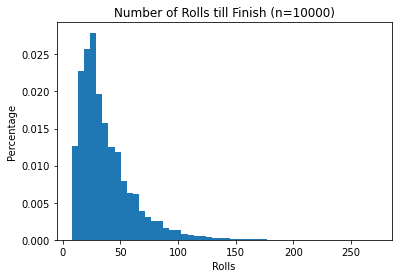

In [150]:
x = np.arange(0,200)
plot.plot(x, poisson.pmf(X, ))

plt.hist(stepsTC, bins = 50, density = True)
plt.title("Number of Rolls till Finish (n=10000)")
plt.xlabel("Rolls")
plt.ylabel("Percentage")

mean = np.mean(stepsTC)
print("Mean number of rolls to finish game: " + str(mean))

In [152]:
#Question 4: Calculate expected number of dice rolls to finish game, need to extend FMP to FMRP

from rl.markov_process import FiniteMarkovRewardProcess, MarkovRewardProcess



class SnakeLaddersReward(FiniteMarkovRewardProcess[StateSL]):

    def __init__(self, ):
        super().__init__(self.get_transition_reward_map())

    def get_transition_reward_map(self) -> Mapping[StateSL, 
                                                  FiniteDistribution[Tuple[StateSL, float]]]:
        d: Dict[StateSL, Categorical[Tuple[StateSL], float]] = {}
        for state in non_terminal:
            state_probs_map: Mapping[Tuple[StateSL, float], float] = {}
            for i in range(1,7):                    
                nextState = None
                if (state+i >= len(moves)) or (moves[state+i] == 100):
                    nextState = StateSL(100)
                    state_probs_map[(nextState,1)] = state_probs_map.get(nextState, 1/6.) + 1/6.;
                else:
                    nextState = StateSL(moves[state+i])
                    state_probs_map[(nextState,1)] = state_probs_map.get(nextState, 1/6.) + 1/6.;
            d[StateSL(state)] = Categorical(state_probs_map)
        return d; 




In [154]:
SL_MRP = SnakeLaddersReward()

gamma = 1
SL_MRP.display_value_function(gamma)

{NonTerminal(state=StateSL(square=2)): 37.761,
 NonTerminal(state=StateSL(square=0)): 37.294,
 NonTerminal(state=StateSL(square=40)): 32.083,
 NonTerminal(state=StateSL(square=39)): 32.542,
 NonTerminal(state=StateSL(square=38)): 33.03,
 NonTerminal(state=StateSL(square=37)): 33.295,
 NonTerminal(state=StateSL(square=35)): 33.432,
 NonTerminal(state=StateSL(square=86)): 18.677,
 NonTerminal(state=StateSL(square=88)): 15.465,
 NonTerminal(state=StateSL(square=89)): 15.715,
 NonTerminal(state=StateSL(square=90)): 14.586,
 NonTerminal(state=StateSL(square=91)): 13.584,
 NonTerminal(state=StateSL(square=99)): 1.0,
 NonTerminal(state=StateSL(square=97)): 7.567,
 NonTerminal(state=StateSL(square=96)): 7.817,
 NonTerminal(state=StateSL(square=94)): 9.716,
 NonTerminal(state=StateSL(square=92)): 14.315,
 NonTerminal(state=StateSL(square=75)): 17.212,
 NonTerminal(state=StateSL(square=76)): 17.935,
 NonTerminal(state=StateSL(square=77)): 18.422,
 NonTerminal(state=StateSL(square=78)): 18.701,
 